In [137]:
!pip install seaborn --upgrade

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 465.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 774.0 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in data
df = pd.read_csv(r'C:\Users\marti\OneDrive\Documents\Data Analysis 2024\1. SQL Data Exploration (1-4)\4. python\movies.csv')

In [34]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [35]:
# Find any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [36]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
# Fill NaN values with 0 and convert to int64
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [53]:
# Extract the year from the 'released' column using a regular expression
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

# Display the DataFrame to verify the changes
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [54]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [55]:
pd.set_option('display.max_rows', None)

In [68]:
# Drop any duplicates and sort values in descending order
unique_companies = df['company'].drop_duplicates().sort_values(ascending=False)
print(unique_companies.head())  # Show only the first few unique company names

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

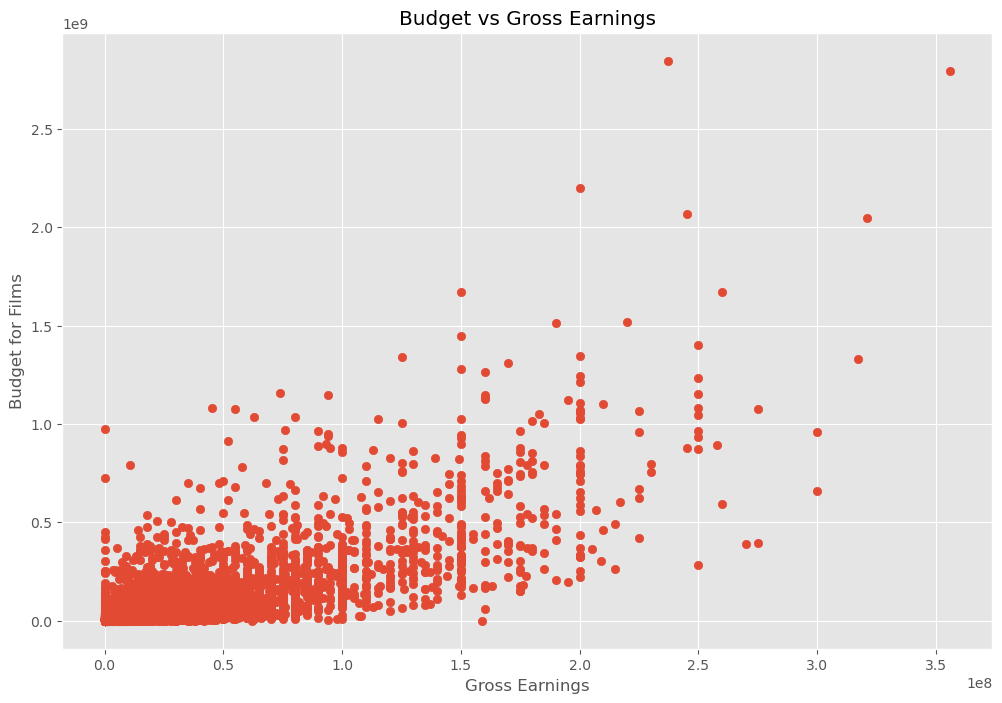

In [57]:
# Scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')

plt.show

In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

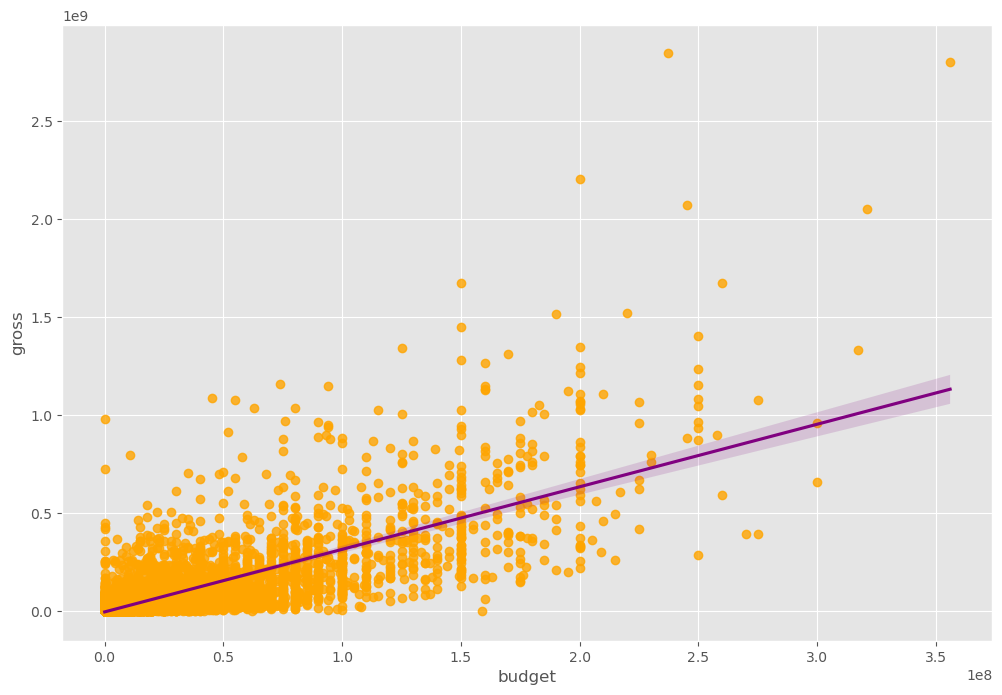

In [59]:
# Plot the Budget vs Gross using Seaborn
sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color": "orange"}, line_kws={"color": "purple"})

In [60]:
# Correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000


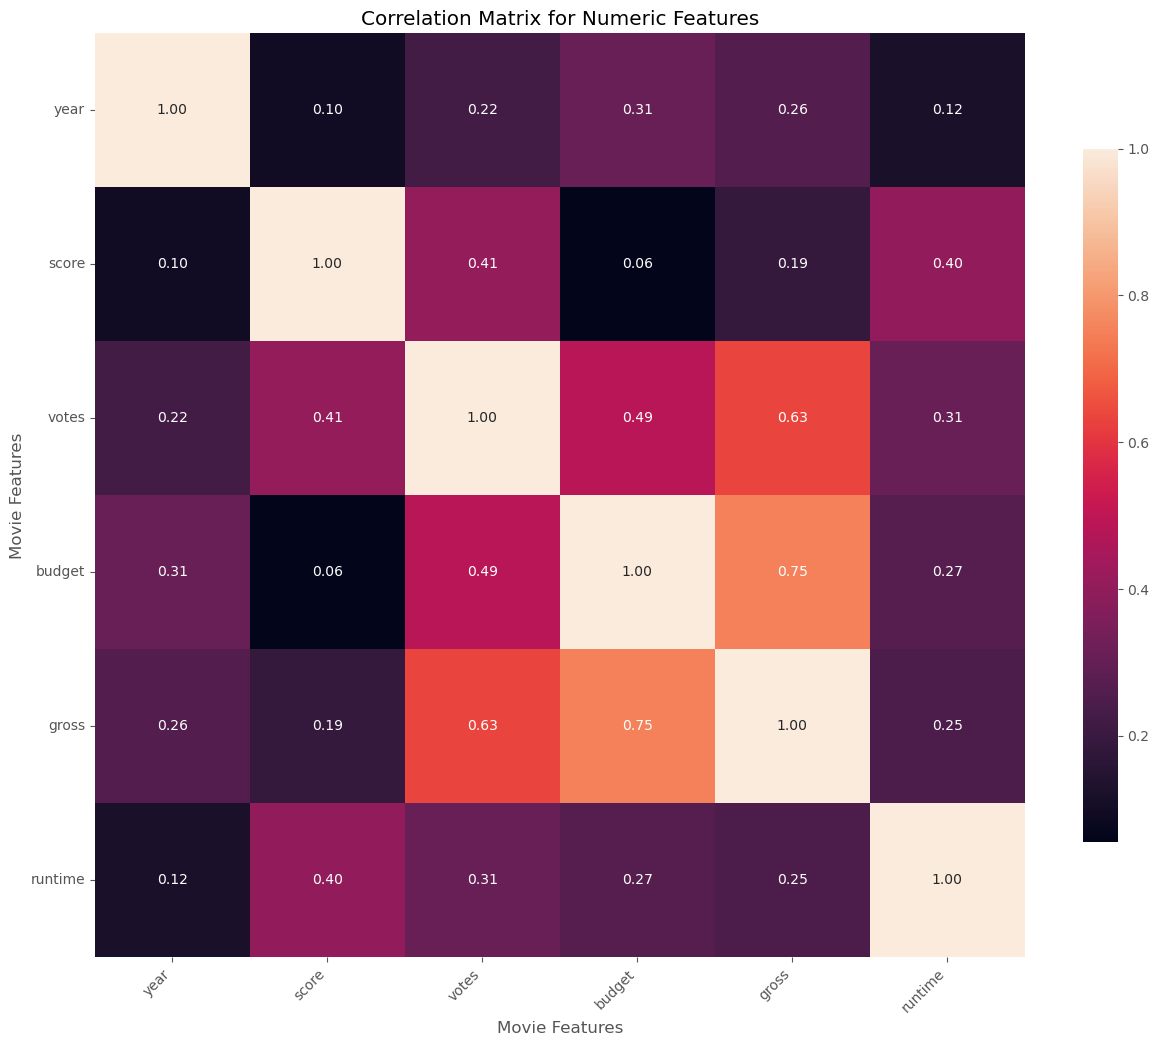

In [61]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap with a larger figure size and adjusted annotation size
plt.figure(figsize=(15, 12))  # Increase the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [62]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.303745,0.138317,0.253921,0.654832,0.107069,0.595693,0.720206,0.782921,0.652825,0.190572,0.111227,0.978147,0.682856,0.071772,0.246864
rating,0.303745,1.000000,-0.012156,0.037943,0.236984,-0.065634,0.118184,0.234942,0.255798,0.243496,0.158906,0.087155,0.310789,0.278639,0.033178,0.026917
genre,0.138317,-0.012156,1.000000,0.087977,0.091329,0.063222,0.148505,0.093376,0.088079,0.097914,-0.073897,0.101278,0.134001,0.058902,0.005608,0.084575
year,0.253921,0.037943,0.087977,1.000000,0.315993,0.076737,0.326540,0.173213,0.212338,0.227650,-0.053654,0.060282,0.266957,0.121209,0.032915,0.940309
released,0.654832,0.236984,0.091329,0.315993,1.000000,0.069264,0.450254,0.502941,0.547946,0.476295,0.162032,0.081272,0.668367,0.465767,0.048271,0.319875
score,0.107069,-0.065634,0.063222,0.076737,0.069264,1.000000,0.233482,0.149685,0.103889,0.106368,-0.098455,0.001150,0.113338,0.036212,0.035619,0.084386
votes,0.595693,0.118184,0.148505,0.326540,0.450254,0.233482,1.000000,0.495026,0.521113,0.451428,0.050708,0.038433,0.611778,0.390451,0.067642,0.321241
director,0.720206,0.234942,0.093376,0.173213,0.502941,0.149685,0.495026,1.000000,0.695986,0.580123,0.197069,0.043545,0.737284,0.614215,0.080077,0.169769
writer,0.782921,0.255798,0.088079,0.212338,0.547946,0.103889,0.521113,0.695986,1.000000,0.590050,0.201840,0.064290,0.797703,0.616145,0.057707,0.206751
star,0.652825,0.243496,0.097914,0.227650,0.476295,0.106368,0.451428,0.580123,0.590050,1.000000,0.221159,0.064879,0.669416,0.569818,0.072482,0.225628


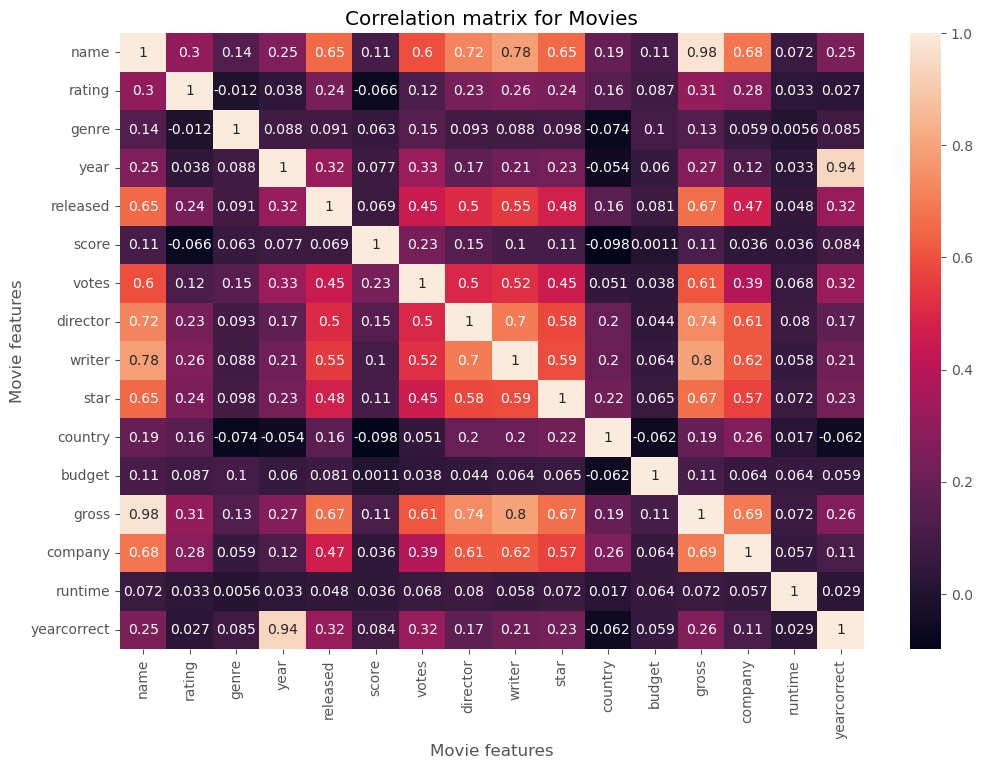

In [63]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [69]:
# Apply factorize and calculate correlation matrix
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
print(correlation_mat.head())  # Show only the first few rows of the correlation matrix

# Unstack the correlation matrix to get pairs and show the head
corr_pairs = correlation_mat.unstack()
print(corr_pairs.head())  # Show only the first few correlation pairs

              name    rating     genre      year  released     score  \
name      1.000000  0.303745  0.138317  0.253921  0.654832  0.107069   
rating    0.303745  1.000000 -0.012156  0.037943  0.236984 -0.065634   
genre     0.138317 -0.012156  1.000000  0.087977  0.091329  0.063222   
year      0.253921  0.037943  0.087977  1.000000  0.315993  0.076737   
released  0.654832  0.236984  0.091329  0.315993  1.000000  0.069264   

             votes  director    writer      star   country    budget  \
name      0.595693  0.720206  0.782921  0.652825  0.190572  0.111227   
rating    0.118184  0.234942  0.255798  0.243496  0.158906  0.087155   
genre     0.148505  0.093376  0.088079  0.097914 -0.073897  0.101278   
year      0.326540  0.173213  0.212338  0.227650 -0.053654  0.060282   
released  0.450254  0.502941  0.547946  0.476295  0.162032  0.081272   

             gross   company   runtime  yearcorrect  
name      0.978147  0.682856  0.071772     0.246864  
rating    0.310789  0.2786

In [70]:
# Sort correlation pairs and show the head
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs.head())  # Show only the first few sorted correlation pairs

score    country   -0.098455
country  score     -0.098455
genre    country   -0.073897
country  genre     -0.073897
score    rating    -0.065634
dtype: float64


In [71]:
# Filter high correlation pairs (greater than 0.5) and show the head
high_corr = sorted_pairs[sorted_pairs > 0.5]
print(high_corr.head())  # Show only the first few high correlation pairs

released  director    0.502941
director  released    0.502941
writer    votes       0.521113
votes     writer      0.521113
writer    released    0.547946
dtype: float64


In [67]:
# Votes and Budget has the highest correlation to Gross Earnings.
# Company has low correlation.